In [ ]:
!pip install numpy
!pip install matplot

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# defining white noise
i = np.random.normal(0,1,20000)

In [3]:
def delta(n,pos):
    if n==pos:
        return 1
    else:
        return 0

In [4]:
def whitenoise(mu, sigma, points):
    return np.random.normal(0,1,20000)

In [5]:
def l_value(n):
    return 0.6*delta(n,0)+0.4*delta(n,1)

In [6]:
def s_value(i,n):
    if n-1 <0:
        return 0.6*i[n]
    else:
        return 0.6*i[n]+0.4*i[n-1]

In [7]:
def s_seq(i,length):
    s = []
    for idx in range(1,length):
        s.append(s_value(i,idx))
    return s

In [8]:
def autocorrelation(start,end):
    R=[]
    for m in range(start,end):
        sum_R_value = 0
        for k in range(start,end):
            R_value = l_value(k)*l_value(m+k)
            sum_R_value = sum_R_value + R_value
        R.append(sum_R_value)
    return R

In [9]:
def compute_ak(R):
    R_seq = []
    R_known = []
    for idx,val in enumerate(R):
        R_seq_row=[]
        for k in range(1,11):
            if k == 10:
                R_value = 0
            elif idx-k < 0:
                R_value = R[np.abs(idx-k)]
            else:
                R_value = R[idx-k]
            R_seq_row.append(R_value)
        R_seq.append(R_seq_row)
        R_known.append(val)
    return R_known, R_seq

In [10]:
def Levinson_alg(R):
    R.append(0)
    A = []
    p = []
    k = []
    # precalculate a1
    a = []
    A.append(["a_00"])
    a1 = R[1]/R[0]
    k1 = R[1]/R[0]
    p1 = (1-k1**2)*R[0]
    a.append("a_10")
    a.append(a1)
    A.append(a)
    p.append(p1)
    k.append(k1)
    for n in range(2,11):
        sum_axR = 0
        a = []
        for k in range(1,n):
            sum_axR = sum_axR + A[n-1][k]*R[n-k]
        k_n = (R[n]-sum_axR)/p[-1]
        p.append(p[-1]*(1-k_n**2))
        a_n_n = k_n
        for k in range(0,n):
            if k == 0:
                a.append("a_{}_0".format(n))
            else:
                a.append(A[n-1][k]-k_n*A[n-1][n-k])
        a.append(a_n_n)
        A.append(a)
    return A[-1]

In [11]:
def prediction(s,a,start,end):
    s_hat = []
    for n in range(start,end):
        sum_axs = 0
        for k in range(1,11):
            sum_axs = sum_axs+a[k]*s[n-k]
        s_hat.append(sum_axs)
    return s_hat

In [12]:
def print_matric(matrix):
    for row in matrix:
        string = ""
        for col in row:
            string = string+"\t"+str(col)
        print(string)

In [16]:
def get_error(s,s_hat):
    error = []
    count = 1
    error_sum = 0
    for (a,b) in zip(s,s_hat):
        error_sum = error_sum + (a-b)**2
        error.append(error_sum/count)
        count = count+1
    return error

In [17]:
def getT(p,delt):
    n=[]
    for d in delt:
        for idx in range(1,101):
            if p[idx-1]>= np.abs(p[idx]-p[idx-1])/d:
                n.append(idx)
                break
    return n

## Main Function

In [26]:
mu = 0
sigma = 1
points = 10000
i = whitenoise(mu,sigma,points)
R = autocorrelation(0,10)
#R_known,R_seq = compute_ak(R)
a_10_k = Levinson_alg(R)
s = s_seq(i,15000)
s_hat = prediction(s,a_10_k,10000,10101)
error = get_error(s[10000:10101],s_hat)

In [22]:
result = getT(error,[0.1,0.05,0.03,0.02,0.01])
print(result)

[5, 6, 6, 6, 16]


## Ploting

<function matplotlib.pyplot.show(close=None, block=None)>

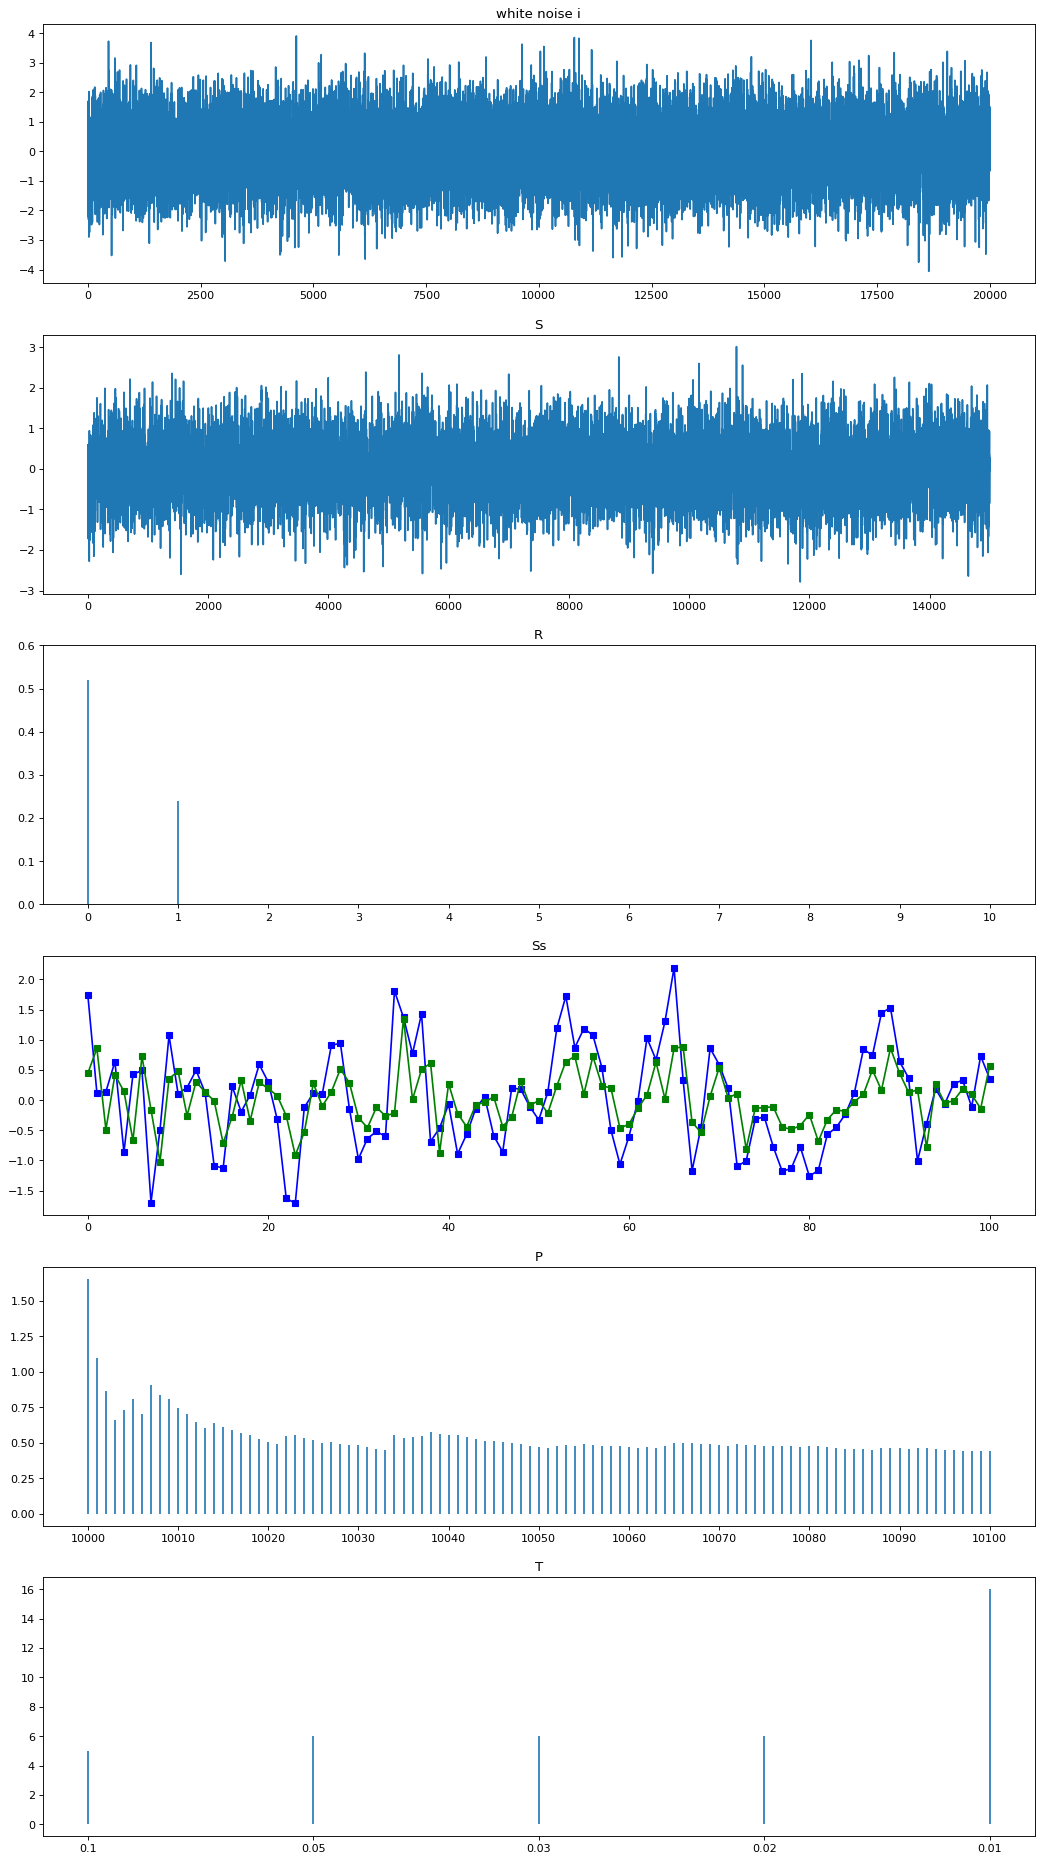

In [27]:
fig = plt.figure(num=None, figsize=(16,30),dpi=80)
axes = []
# white noise i
axes.append(fig.add_subplot(6,1,1))
axes[-1].set_title("white noise i")
plt.plot(i)
# S
axes.append(fig.add_subplot(6,1,2))
axes[-1].set_title("S")
plt.plot(s)
# R
axes.append(fig.add_subplot(6,1,3))
axes[-1].set_title("R")
plt.ylim([0, 0.6])
plt.xticks(range(0,11))
for idx,value in enumerate(R):
    plt.vlines(idx, ymin=0, ymax=value)
# predicted s and s
ax = fig.add_subplot(6,1,4)
axes.append(ax)
axes[-1].set_title("Ss")
ax.plot(s[10000:10101],c='b', marker="s", label='S')
ax.plot(s_hat,c='g', marker="s", label='s_hat')
# error
axes.append(fig.add_subplot(6,1,5))
axes[-1].set_title("P")
plt.xticks(range(0,101,10),range(10000,10101,10))
for idx,value in enumerate(error):
    plt.vlines(idx, ymin=0, ymax=value)
# T
axes.append(fig.add_subplot(6,1,6))
axes[-1].set_title("T")
plt.xticks(np.arange(5),[0.1,0.05,0.03,0.02,0.01])
for idx,value in enumerate(result):
    plt.vlines(idx, ymin=0, ymax=value)
plt.show